# LOGISTIC REGRESSION

## Logistic regression is a method used to predict a dependent variable, given a set of independent variables, such that the dependent variable is categorical.
### Dependent variables (Y): The response binary variable holding values like 0 or 1, Yes or No.
### Independent variable (X): The predictor variable used to predict the response variable.

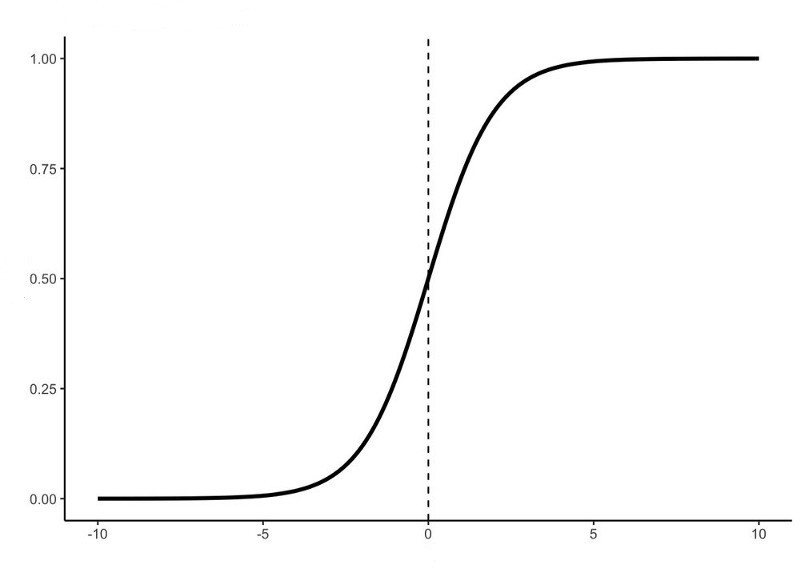

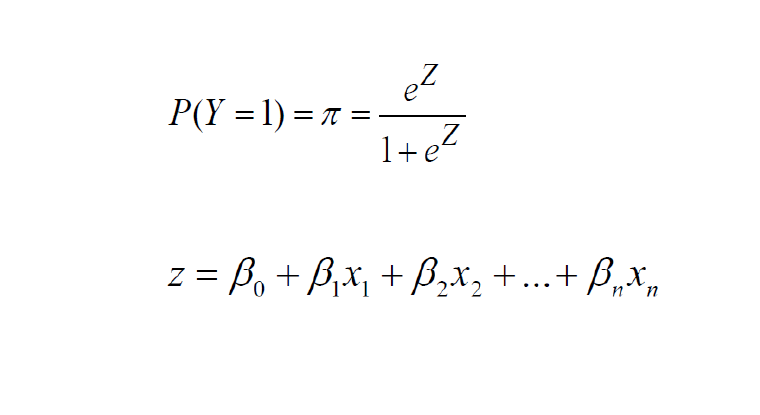

# Fresco Retailer Case Study
* The data analyses Fresco Retail’s customers’ transaction data to predict return decision using various data points like customer background, payment modes, store types, product nature, etc.
* The objective is to study the influence of different transaction data points and their impact on a customer’s final decision to return the product(s) bought in a transaction.

### Importing libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import preprocessing

In [2]:
os.chdir(r'G:\Ivy Pro Data Science, AI and Machine L\PYTHON\Case Study')
os.getcwd()

'G:\\Ivy Pro Data Science, AI and Machine L\\PYTHON\\Case Study'

### Import dataset

In [3]:
df_Transaction_Data = pd.read_excel(r'Fresco - Large Retailer - Predict Returns.xlsx', sheet_name = "Transaction_Data")

In [4]:
df_Transaction_Data.head()

,transaction_id,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,Store_type,Reviews,CustID,Income,city_code,Return
0,41453307,1,2,6,3,359,1795,188.475,90.0,Mobile Payments,e-Shop,1.0,14644,67501.0,8,True
1,49441287,1,3,3,5,1129,5645,592.725,250.0,Credit Card,TeleShop,1.0,14569,102738.0,2,True
2,426787191,1,6,1,4,1327,6635,696.675,NaN,Debit Card,MBR,1.0,14356,104013.0,5,True
3,525041466,1,5,4,5,1325,6625,695.625,NaN,Debit Card,MBR,4.0,12776,92580.0,8,True
4,1167308476,1,3,3,3,1237,6185,649.425,NaN,Debit Card,MBR,1.0,1101,101763.0,3,True


In [5]:
df_Customer_details = pd.read_excel(r'Fresco - Large Retailer - Predict Returns.xlsx', sheet_name = "Customer_details")

In [6]:
df_Customer_details.head()

,CustID,DOB,Gender,Marital_status,Education_code,Profession_Code
0,14644,1985-12-31,M,0,4,3
1,14569,1985-12-31,M,1,3,2
2,14356,1985-12-31,M,1,1,2
3,12776,1985-12-31,M,1,5,3
4,1101,1985-12-31,M,0,1,3


In [7]:
df_Profession_Code = pd.read_excel(r'Fresco - Large Retailer - Predict Returns.xlsx', sheet_name = "Profession_Code")

In [8]:
df_Profession_Code.head()

,Profession,Type
0,1,Self Employed
1,2,Salaried
2,3,Others


In [9]:
df_Education_Level_name = pd.read_excel(r'Fresco - Large Retailer - Predict Returns.xlsx', sheet_name = "Education_Level_name")

In [10]:
df_Education_Level_name.head()

,Education_Level_Code,Level_Education
0,1,Basic
1,2,Graduation
2,3,Master
3,4,PhD
4,5,Others


In [11]:
df_Month_name = pd.read_excel(r'Fresco - Large Retailer - Predict Returns.xlsx', sheet_name = "Month_name")

In [12]:
df_Month_name.head()

,Code,Month_name
0,1,January
1,2,February
2,3,March
3,4,April
4,5,May


In [13]:
df_prod_cat_name = pd.read_excel(r'Fresco - Large Retailer - Predict Returns.xlsx', sheet_name = "prod_cat_name")

In [14]:
df_prod_cat_name.head()

,Code,prod_cat
0,1,Bags
1,2,Books
2,3,Clothing
3,4,Electronics
4,5,Footwear


In [15]:
df_prod_subcat_name = pd.read_excel(r'Fresco - Large Retailer - Predict Returns.xlsx', sheet_name = "prod_subcat_name")

In [16]:
df_prod_subcat_name.head()

,Code,prod_subcat
0,1,Bath
1,2,Academic
2,3,Women
3,4,Mens
4,5,Tools


In [17]:
df_City_name = pd.read_excel(r'Fresco - Large Retailer - Predict Returns.xlsx', sheet_name = "City_name")

In [18]:
df_City_name.head()

,City_Code,City_Code_Name
0,1,Mumbai
1,2,Bangalore
2,3,New Delhi
3,4,Gurgaon
4,5,Kolkata


##### Renaming columns for merging dataframes

In [19]:
df_Education_Level_name.rename(columns={'Education_Level_Code': 'Education_code'}, inplace=True)

In [20]:
df_Profession_Code.rename(columns={'Profession': 'Profession_Code'}, inplace=True)

In [21]:
df_prod_subcat_name.rename(columns={'Code': 'prod_subcat_code'}, inplace=True)

In [22]:
df_prod_cat_name.rename(columns={'Code': 'prod_cat_code'}, inplace=True)

In [23]:
df_Month_name.rename(columns={'Code': 'Month_code'}, inplace=True)

In [24]:
df_City_name.rename(columns={'City_Code': 'city_code'}, inplace=True)

In [25]:
# Creating empty dataframe
data = pd.DataFrame()

### Since there are total 8 excel files and all files have some common columns , so for model building the all datasets are mapped into the final dataframe using pd.merge

In [26]:
# Merging all the dataframes on the basis of common columns 

data = pd.merge(df_Customer_details, df_Education_Level_name, how = 'left', on = 'Education_code')
data = pd.merge(data, df_Profession_Code, how = 'left', on = 'Profession_Code')
data = pd.merge(df_Transaction_Data, data, how = 'left', on = 'CustID')
data = pd.merge(data, df_prod_subcat_name, how = 'left', on = 'prod_subcat_code')
data = pd.merge(data, df_prod_cat_name, how = 'left', on = 'prod_cat_code')
data = pd.merge(data, df_Month_name, how = 'left', on = 'Month_code')
data = pd.merge(data, df_City_name, how = 'left', on = 'city_code')

### FINAL DATASET 

In [27]:
# A view at the final dataset 
data.head()

,transaction_id,Month_code,prod_cat_code,prod_subcat_code,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,...,Gender,Marital_status,Education_code,Profession_Code,Level_Education,Type,prod_subcat,prod_cat,Month_name,City_Code_Name
0,41453307,1,2,6,3,359,1795,188.475,90.0,Mobile Payments,...,M,0,4,3,PhD,Others,Fiction,Books,January,Hyderabad
1,49441287,1,3,3,5,1129,5645,592.725,250.0,Credit Card,...,M,1,3,2,Master,Salaried,Women,Clothing,January,Bangalore
2,426787191,1,6,1,4,1327,6635,696.675,NaN,Debit Card,...,M,1,1,2,Basic,Salaried,Bath,Home and kitchen,January,Kolkata
3,525041466,1,5,4,5,1325,6625,695.625,NaN,Debit Card,...,M,1,5,3,Others,Others,Mens,Footwear,January,Hyderabad
4,1167308476,1,3,3,3,1237,6185,649.425,NaN,Debit Card,...,M,0,1,3,Basic,Others,Women,Clothing,January,New Delhi


In [28]:
data.drop(['Month_code','prod_cat_code','prod_subcat_code','Education_code','Profession_Code','city_code'],axis = 1, inplace = True)

### Basic EDA

In [29]:
data.columns

Index(['transaction_id', 'Qty', 'Rate', 'Amount', 'Tax', 'Delivery_chrgs',
       'Payment_mode', 'Store_type', 'Reviews', 'CustID', 'Income', 'Return',
       'DOB', 'Gender', 'Marital_status', 'Level_Education', 'Type',
       'prod_subcat', 'prod_cat', 'Month_name', 'City_Code_Name'],
      dtype='object')

In [30]:
data.shape

(19597, 21)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19597 entries, 0 to 19596
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   transaction_id   19597 non-null  int64         
 1   Qty              19597 non-null  int64         
 2   Rate             19597 non-null  int64         
 3   Amount           19597 non-null  int64         
 4   Tax              19597 non-null  float64       
 5   Delivery_chrgs   10707 non-null  float64       
 6   Payment_mode     19597 non-null  object        
 7   Store_type       19597 non-null  object        
 8   Reviews          19546 non-null  float64       
 9   CustID           19597 non-null  int64         
 10  Income           19554 non-null  float64       
 11  Return           19597 non-null  bool          
 12  DOB              19597 non-null  datetime64[ns]
 13  Gender           19597 non-null  object        
 14  Marital_status   19597 non-null  int64

In [32]:
# Now we will check the descriptive statistics of our numerical features
data.describe()

,transaction_id,Qty,Rate,Amount,Tax,Delivery_chrgs,Reviews,CustID,Income,Marital_status
count,1.959700e+04,19597.000000,19597.000000,19597.00000,19597.000000,10707.000000,19546.000000,19597.000000,19554.000000,19597.00000
mean,5.304610e+10,3.098178,777.154718,2302.11563,241.722141,119.156627,3.882329,9799.000000,70539.063977,0.52901
std,2.724848e+10,1.445638,414.308709,1742.62635,182.975767,74.670135,1.414998,5657.310948,37428.491760,0.49917
min,4.145331e+07,1.000000,70.000000,70.00000,7.350000,0.000000,1.000000,1.000000,7157.000000,0.00000
25%,2.943273e+10,2.000000,418.000000,915.00000,96.075000,50.000000,3.000000,4900.000000,37962.000000,0.00000
50%,5.332340e+10,3.000000,775.000000,1826.00000,191.730000,90.000000,4.000000,9799.000000,69316.000000,1.00000
75%,7.684265e+10,4.000000,1136.000000,3348.00000,351.540000,200.000000,5.000000,14698.000000,99548.000000,1.00000
max,9.998755e+10,5.000000,1500.000000,7500.00000,787.500000,250.000000,5.000000,19597.000000,159984.000000,1.00000


* Here, the maximum value for Rate is 1500 and min is 70
* For Delivery_chrgs the maximum value is 250 and min is 0, i.e. there are no delivery charges for some products

In [33]:
# descriptive statistics for both numerical and categorical variables
data.describe(include="all")

,transaction_id,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,Store_type,Reviews,CustID,...,Return,DOB,Gender,Marital_status,Level_Education,Type,prod_subcat,prod_cat,Month_name,City_Code_Name
count,1.959700e+04,19597.000000,19597.000000,19597.00000,19597.000000,10707.000000,19597,19597,19546.000000,19597.000000,...,19597,19597,19597,19597.00000,19597,19597,19597,19597,19597,19597
unique,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,NaN,...,2,3998,2,NaN,5,3,16,6,12,10
top,NaN,NaN,NaN,NaN,NaN,NaN,Mobile Payments,e-Shop,NaN,NaN,...,False,1985-06-12 00:00:00,M,NaN,Others,Self Employed,Women,Footwear,January,Chennai
freq,NaN,NaN,NaN,NaN,NaN,NaN,8191,8014,NaN,NaN,...,17541,21,12085,NaN,4130,6632,5494,5027,1908,2067
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1964-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1985-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.304610e+10,3.098178,777.154718,2302.11563,241.722141,119.156627,NaN,NaN,3.882329,9799.000000,...,NaN,NaN,NaN,0.52901,NaN,NaN,NaN,NaN,NaN,NaN
std,2.724848e+10,1.445638,414.308709,1742.62635,182.975767,74.670135,NaN,NaN,1.414998,5657.310948,...,NaN,NaN,NaN,0.49917,NaN,NaN,NaN,NaN,NaN,NaN
min,4.145331e+07,1.000000,70.000000,70.00000,7.350000,0.000000,NaN,NaN,1.000000,1.000000,...,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.943273e+10,2.000000,418.000000,915.00000,96.075000,50.000000,NaN,NaN,3.000000,4900.000000,...,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# descriptive statistics for categorical variables
data.describe(include="O")

,Payment_mode,Store_type,Gender,Level_Education,Type,prod_subcat,prod_cat,Month_name,City_Code_Name
count,19597,19597,19597,19597,19597,19597,19597,19597,19597
unique,4,4,2,5,3,16,6,12,10
top,Mobile Payments,e-Shop,M,Others,Self Employed,Women,Footwear,January,Chennai
freq,8191,8014,12085,4130,6632,5494,5027,1908,2067


In [35]:
# Filling NaN with zero, this means that the delivery charges for some of the products is zero
data['Delivery_chrgs'].fillna(0, inplace=True)

In [36]:
# Drop useless columns like transaction_id, CustID and DOB. These irrelevant columns will not help us in the model building.
data.drop(['transaction_id', 'CustID', 'DOB'], axis = 1, inplace = True)

Qty                 0
Rate                0
Amount              0
Tax                 0
Delivery_chrgs      0
Payment_mode        0
Store_type          0
Reviews            51
Income             43
Return              0
Gender              0
Marital_status      0
Level_Education     0
Type                0
prod_subcat         0
prod_cat            0
Month_name          0
City_Code_Name      0
dtype: int64


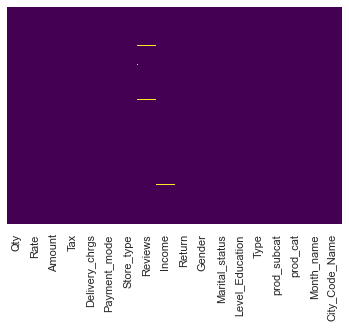

In [37]:
#checking for missing values
print(data.isnull().sum())

# to see missing value using visualisation
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
(data.isnull().sum()/data.isnull().count())
#Percent of missing "Reviews" records is 0.26%
#Percent of missing "Income" records is 0.22%

Qty                0.000000
Rate               0.000000
Amount             0.000000
Tax                0.000000
Delivery_chrgs     0.000000
Payment_mode       0.000000
Store_type         0.000000
Reviews            0.002602
Income             0.002194
Return             0.000000
Gender             0.000000
Marital_status     0.000000
Level_Education    0.000000
Type               0.000000
prod_subcat        0.000000
prod_cat           0.000000
Month_name         0.000000
City_Code_Name     0.000000
dtype: float64

In [39]:
# Since the missing values are not huge in number, so it will not affect the original dataframe much.
data.dropna(inplace=True)

In [40]:
## check duplicates
print(data.duplicated().value_counts())
data.drop_duplicates(inplace = True)
print(len(data))

False    19504
dtype: int64
19504


In [41]:
data.head()

,Qty,Rate,Amount,Tax,Delivery_chrgs,Payment_mode,Store_type,Reviews,Income,Return,Gender,Marital_status,Level_Education,Type,prod_subcat,prod_cat,Month_name,City_Code_Name
0,3,359,1795,188.475,90.0,Mobile Payments,e-Shop,1.0,67501.0,True,M,0,PhD,Others,Fiction,Books,January,Hyderabad
1,5,1129,5645,592.725,250.0,Credit Card,TeleShop,1.0,102738.0,True,M,1,Master,Salaried,Women,Clothing,January,Bangalore
2,4,1327,6635,696.675,0.0,Debit Card,MBR,1.0,104013.0,True,M,1,Basic,Salaried,Bath,Home and kitchen,January,Kolkata
3,5,1325,6625,695.625,0.0,Debit Card,MBR,4.0,92580.0,True,M,1,Others,Others,Mens,Footwear,January,Hyderabad
4,3,1237,6185,649.425,0.0,Debit Card,MBR,1.0,101763.0,True,M,0,Basic,Others,Women,Clothing,January,New Delhi


### This data set contains the following variables: 

* Qty : Numerical	
* Rate :Numerical
* Amount : Numerical
* Tax : Numerical
* Delivery_chrgs : Numerical	
* Payment_mode : Categorical
* Store_type : Categorical 
* Reviews : Numerical                
* Income : Numerical             
* city_code : Categorical               
* Return : Categorical                              
* Gender : Categorical	
* Marital_status : Categorical	
* Level_Education : Categorical	
* Type : Categorical	
* prod_subcat : Categorical	
* prod_cat : Categorical	
* Month_name : Categorical	
* City_Code_Name : Categorical

### Exploratory Data Analysis

#### Target variable -------> Return

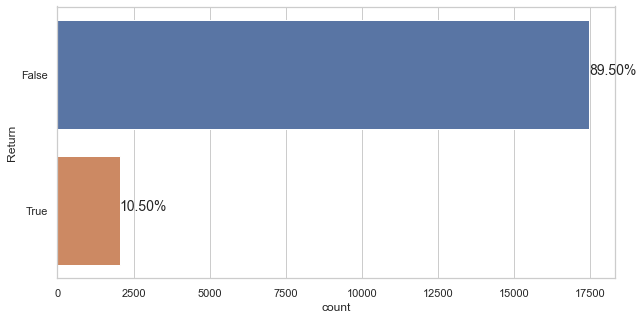

In [42]:
plt.figure(figsize=(10,5))
plt.rc("font", size=14)
ax = sns.countplot(y ='Return',data=data)
total = len(data['Return'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
plt.rc("font", size=14)
plt.show()

* Over here we see that percentage of the products that have not returned are 89.5% and the returned is only 10.50%
* After checking the percentage it implies that this Fresco Retail data is imbalanced.

### Uni-variate Analysis

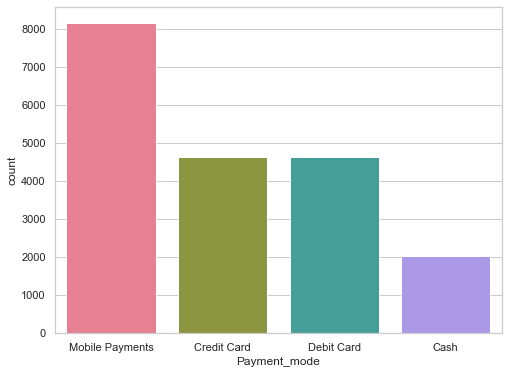

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Payment_mode', data = data, palette ='husl')
plt.show()

#### Here we can see most of the transaction has been done by Mobile payments

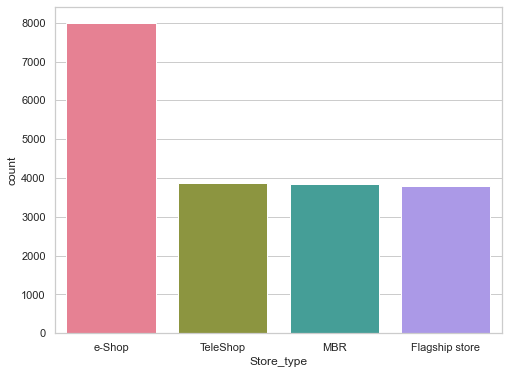

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Store_type', data = data, palette ='husl')
plt.show()

#### The buying of the product can be seen maximum in terms of E-shop. 

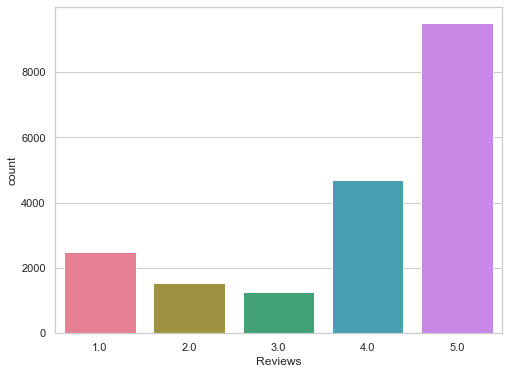

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Reviews', data = data, palette ='husl')
plt.show()

#### The maximum review for the product is 5.0 and the second highest review for product is 4.0

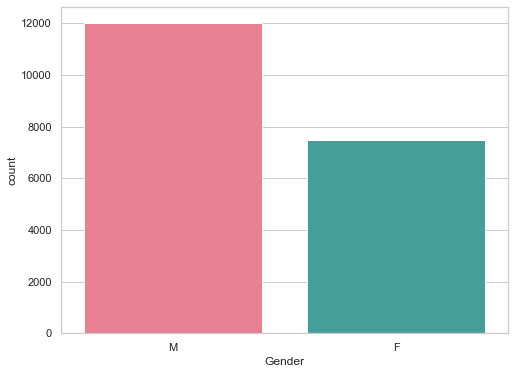

In [46]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Gender', data = data, palette ='husl')
plt.show()

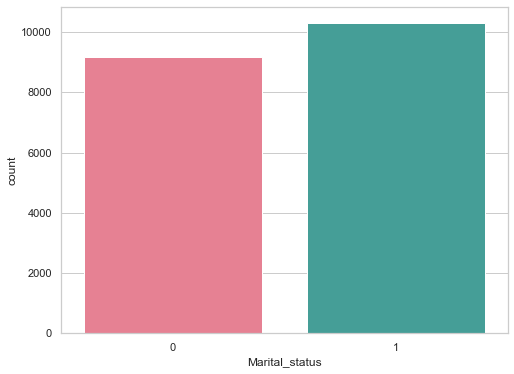

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Marital_status', data = data, palette ='husl')
plt.show()

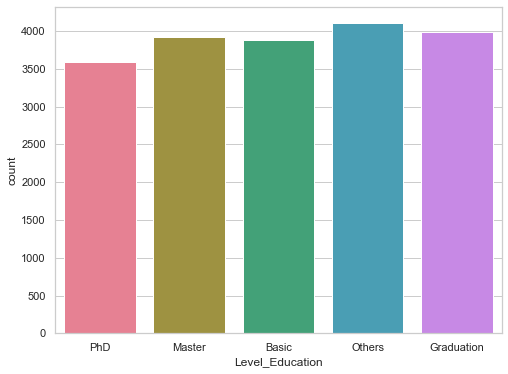

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Level_Education', data = data, palette ='husl')
plt.show()

#### The Customer's education level is maximum for the miscellaneous

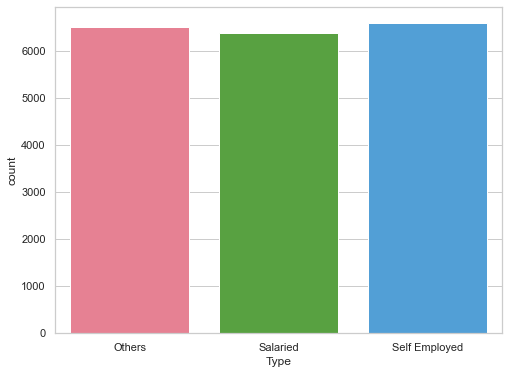

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Type', data = data, palette ='husl')
plt.show()

#### The maximum return is can be seen for the Self-Employed

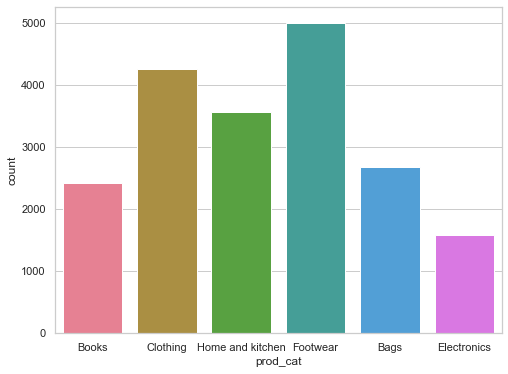

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(x ='prod_cat', data = data, palette ='husl')
plt.show()

#### Over here we can see that the maximum customers are more interested in buying Footwear and Clothing

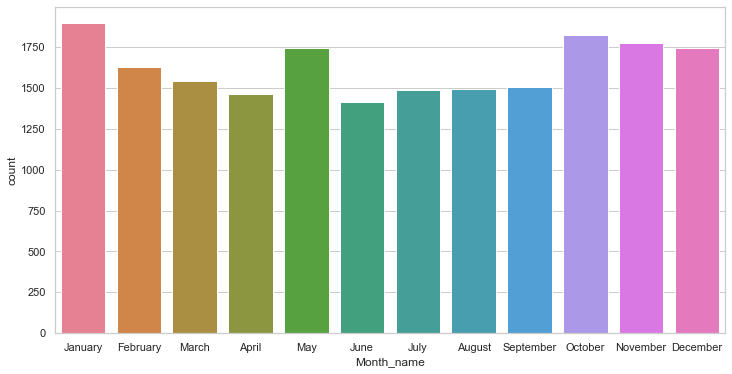

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(x ='Month_name', data = data, palette ='husl')
plt.show()

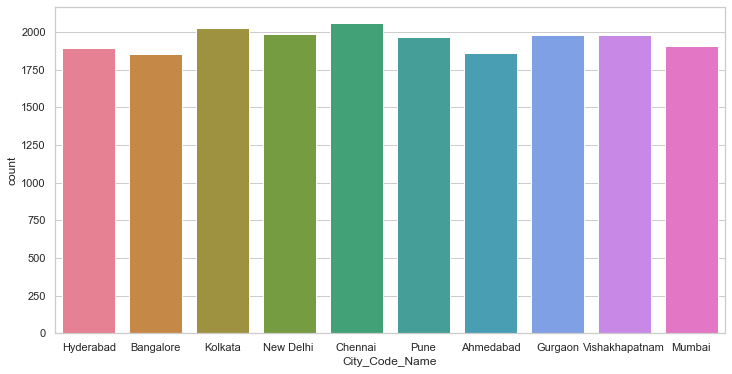

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(x ='City_Code_Name', data = data, palette ='husl')
plt.show()

### Bi-variate Analysis
Boxplots for Continuous Vs Categorical columns

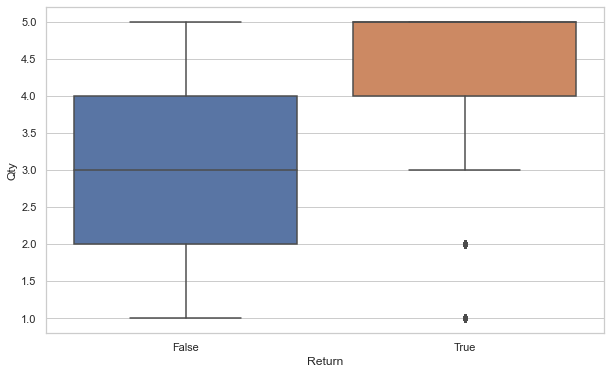

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "Return", y = 'Qty', data = data)
plt.show()

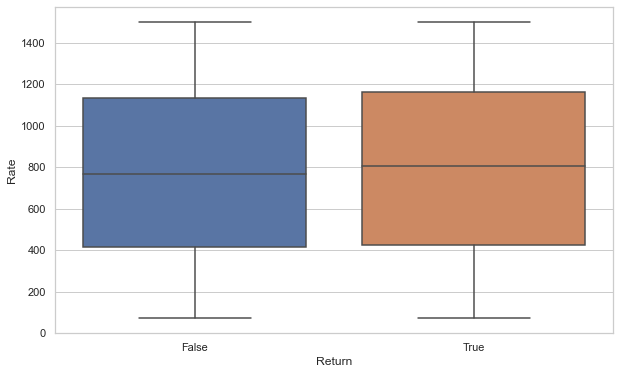

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "Return", y = 'Rate', data = data)
plt.show()

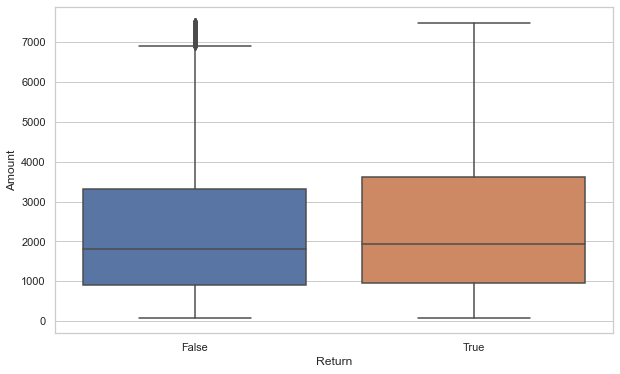

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "Return", y = 'Amount', data = data)
plt.show()

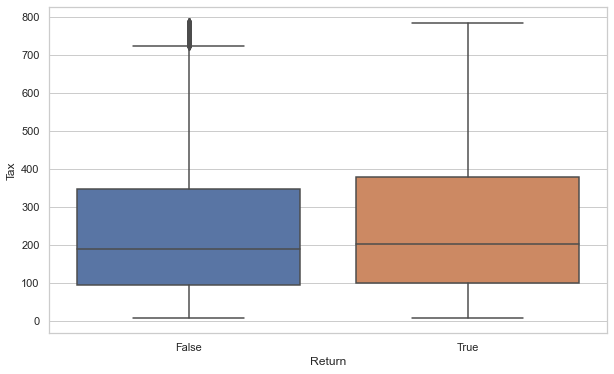

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "Return", y = 'Tax', data = data)
plt.show()

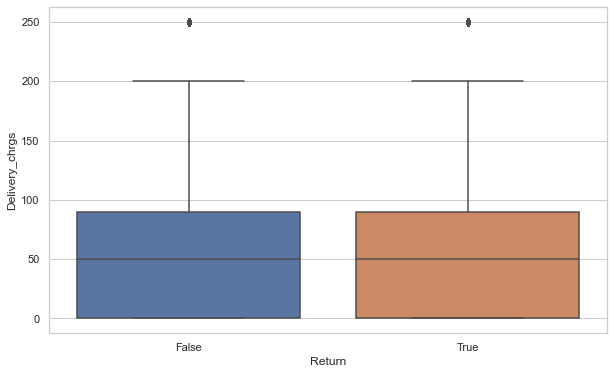

In [57]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "Return", y = 'Delivery_chrgs', data = data)
plt.show()

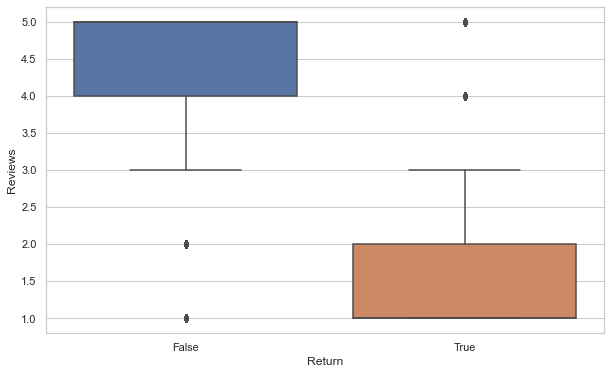

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "Return", y = 'Reviews', data = data)
plt.show()

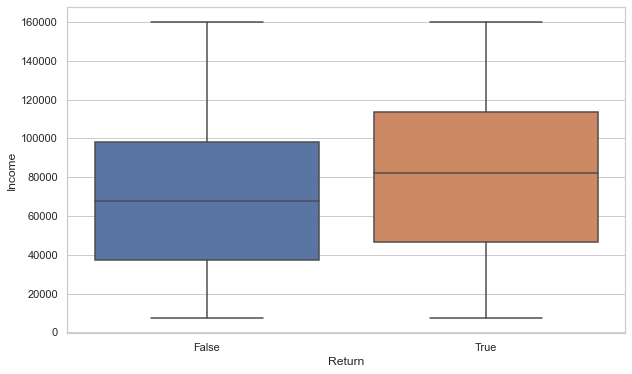

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "Return", y = 'Income', data = data)
plt.show()

### Mutivariate Analysis

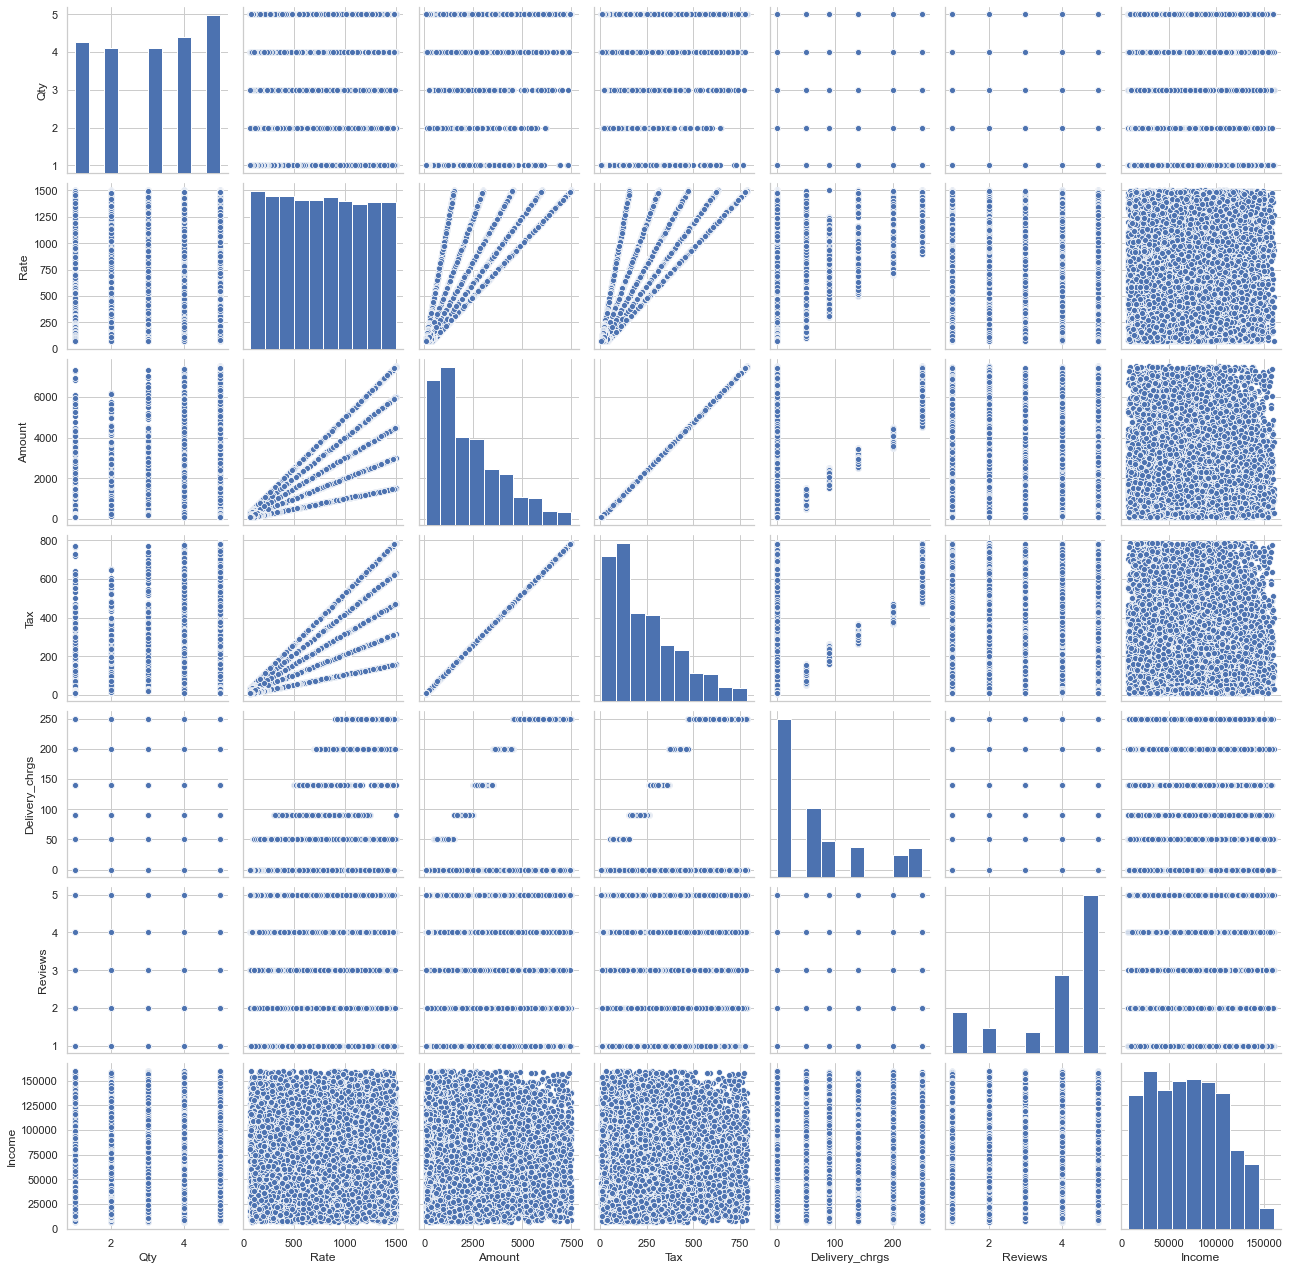

In [60]:
# Let's look at the pairplot for numerical variables
sns.set_style('whitegrid')
sns.pairplot(data[['Qty', 'Rate', 'Amount', 'Tax', 'Delivery_chrgs','Reviews', 'Income']])
plt.show()

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19504 entries, 0 to 19596
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Qty              19504 non-null  int64  
 1   Rate             19504 non-null  int64  
 2   Amount           19504 non-null  int64  
 3   Tax              19504 non-null  float64
 4   Delivery_chrgs   19504 non-null  float64
 5   Payment_mode     19504 non-null  object 
 6   Store_type       19504 non-null  object 
 7   Reviews          19504 non-null  float64
 8   Income           19504 non-null  float64
 9   Return           19504 non-null  bool   
 10  Gender           19504 non-null  object 
 11  Marital_status   19504 non-null  int64  
 12  Level_Education  19504 non-null  object 
 13  Type             19504 non-null  object 
 14  prod_subcat      19504 non-null  object 
 15  prod_cat         19504 non-null  object 
 16  Month_name       19504 non-null  object 
 17  City_Code_Na

### Feature Engineering

In [62]:
data['Return'].replace({True:'Yes',False: 'No'}, inplace= True)

In [63]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [64]:
# creating dummies for categorical variables
X_Dummies = pd.get_dummies(data[['Type', 'prod_subcat', 'prod_cat', 'Month_name', 'City_Code_Name', 'Payment_mode',
                               'Store_type','Gender']])

In [65]:
X_Dummies.head()

,Type_Others,Type_Salaried,Type_Self Employed,prod_subcat_Academic,prod_subcat_Audio and video,prod_subcat_Bath,prod_subcat_Cameras,prod_subcat_Computers,prod_subcat_DIY,prod_subcat_Fiction,...,Payment_mode_Cash,Payment_mode_Credit Card,Payment_mode_Debit Card,Payment_mode_Mobile Payments,Store_type_Flagship store,Store_type_MBR,Store_type_TeleShop,Store_type_e-Shop,Gender_F,Gender_M
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [66]:
data = data.drop(['Type', 'prod_subcat', 'prod_cat', 'Month_name', 'City_Code_Name', 'Payment_mode',
                               'Store_type','Gender'],axis=1)

In [67]:
labelencoder = LabelEncoder()

In [68]:
# Label Encoding for Level_Education variable
data['Level_Education']= labelencoder.fit_transform(data['Level_Education'])

In [69]:
# merging both dummies data for categorical var and the original data using pd.concat
dataset = pd.concat([data,X_Dummies],axis=1)

In [70]:
dataset.head()

,Qty,Rate,Amount,Tax,Delivery_chrgs,Reviews,Income,Return,Marital_status,Level_Education,...,Payment_mode_Cash,Payment_mode_Credit Card,Payment_mode_Debit Card,Payment_mode_Mobile Payments,Store_type_Flagship store,Store_type_MBR,Store_type_TeleShop,Store_type_e-Shop,Gender_F,Gender_M
0,3,359,1795,188.475,90.0,1.0,67501.0,Yes,0,4,...,0,0,0,1,0,0,0,1,0,1
1,5,1129,5645,592.725,250.0,1.0,102738.0,Yes,1,2,...,0,1,0,0,0,0,1,0,0,1
2,4,1327,6635,696.675,0.0,1.0,104013.0,Yes,1,0,...,0,0,1,0,0,1,0,0,0,1
3,5,1325,6625,695.625,0.0,4.0,92580.0,Yes,1,3,...,0,0,1,0,0,1,0,0,0,1
4,3,1237,6185,649.425,0.0,1.0,101763.0,Yes,0,0,...,0,0,1,0,0,1,0,0,0,1


## Statistical Testing
* Correlation Test
* ANOVA Test 
* Chi-Square Test

### Correlation Test

In [72]:
# Correlation Matrix for numerical variables
num_data = dataset[['Qty', 'Rate', 'Amount', 'Tax', 'Delivery_chrgs','Reviews', 'Income']].corr()
num_data

,Qty,Rate,Amount,Tax,Delivery_chrgs,Reviews,Income
Qty,1.000000,-0.017416,0.547099,0.547099,0.346513,-0.138797,0.020355
Rate,-0.017416,1.000000,0.695217,0.695217,0.420517,-0.008603,0.000127
Amount,0.547099,0.695217,1.000000,1.000000,0.609654,-0.005026,-0.006164
Tax,0.547099,0.695217,1.000000,1.000000,0.609654,-0.005026,-0.006164
Delivery_chrgs,0.346513,0.420517,0.609654,0.609654,1.000000,0.008745,0.006873
Reviews,-0.138797,-0.008603,-0.005026,-0.005026,0.008745,1.000000,-0.056440
Income,0.020355,0.000127,-0.006164,-0.006164,0.006873,-0.056440,1.000000


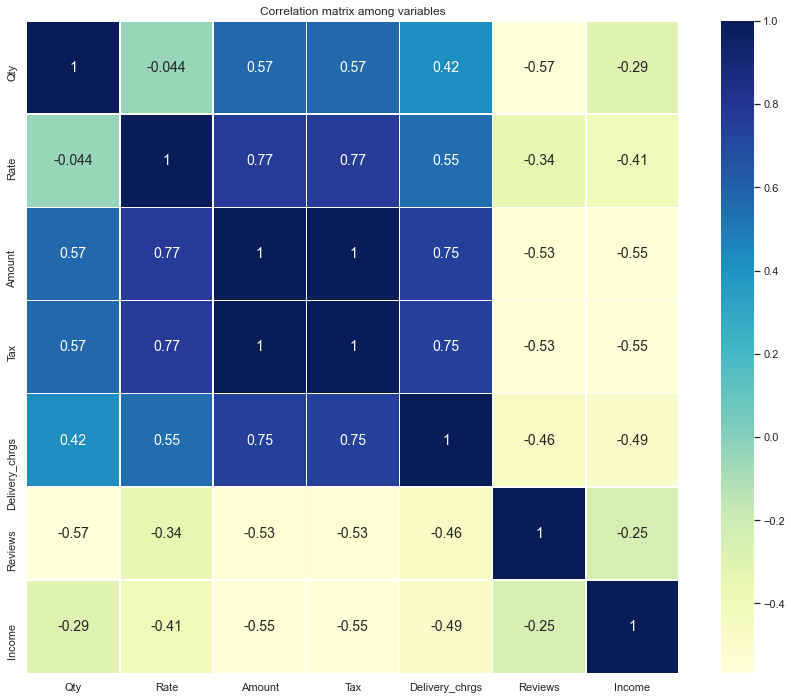

In [73]:
# HeatMap 
plt.figure(figsize=(15,12))
sns.heatmap(num_data.corr(), square=True, annot=True, linewidths=.5, cmap="YlGnBu")
plt.title("Correlation matrix among variables")
plt.show()

### ANOVA Test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

- Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
- ANOVA Test result: Probability of H0 being true

In [74]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [75]:
FunctionAnova(inpData=dataset, TargetVariable="Return", ContinuousPredictorList=num_data)

##### ANOVA Results ##### 

Qty is correlated with Return | P-Value: 3.58758398224266e-310
Rate is correlated with Return | P-Value: 0.02375587373146212
Amount is correlated with Return | P-Value: 0.00035675169948779943
Tax is correlated with Return | P-Value: 0.00035675169948779943
Delivery_chrgs is NOT correlated with Return | P-Value: 0.9073150990501615
Reviews is correlated with Return | P-Value: 0.0
Income is correlated with Return | P-Value: 1.3726081590526736e-41


['Qty', 'Rate', 'Amount', 'Tax', 'Reviews', 'Income']

In [76]:
# we wil drop the Delivery_chrgs variable as it has high p-value
dataset.drop(['Delivery_chrgs'], axis = 1, inplace=True)

#### Creating the Independendent and Dependent Data Sets

In [77]:
# Feature or Independent variables
X = dataset.drop(["Return"],axis = 1)

In [78]:
X.head()

,Qty,Rate,Amount,Tax,Reviews,Income,Marital_status,Level_Education,Type_Others,Type_Salaried,...,Payment_mode_Cash,Payment_mode_Credit Card,Payment_mode_Debit Card,Payment_mode_Mobile Payments,Store_type_Flagship store,Store_type_MBR,Store_type_TeleShop,Store_type_e-Shop,Gender_F,Gender_M
0,3,359,1795,188.475,1.0,67501.0,0,4,1,0,...,0,0,0,1,0,0,0,1,0,1
1,5,1129,5645,592.725,1.0,102738.0,1,2,0,1,...,0,1,0,0,0,0,1,0,0,1
2,4,1327,6635,696.675,1.0,104013.0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,5,1325,6625,695.625,4.0,92580.0,1,3,1,0,...,0,0,1,0,0,1,0,0,0,1
4,3,1237,6185,649.425,1.0,101763.0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [79]:
# Label or Dependent variable
y = dataset["Return"]

In [80]:
y

0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
19592    Yes
19593     No
19594     No
19595     No
19596     No
Name: Return, Length: 19504, dtype: object

In [81]:
# Here, changing the dependent variable in 1's and 0's form.
y = y.replace({'Yes':1,'No':0})

### Chi-Square Test for Categorical variables

In [82]:
X.columns

Index(['Qty', 'Rate', 'Amount', 'Tax', 'Reviews', 'Income', 'Marital_status',
       'Level_Education', 'Type_Others', 'Type_Salaried', 'Type_Self Employed',
       'prod_subcat_Academic', 'prod_subcat_Audio and video',
       'prod_subcat_Bath', 'prod_subcat_Cameras', 'prod_subcat_Computers',
       'prod_subcat_DIY', 'prod_subcat_Fiction', 'prod_subcat_Furnishing',
       'prod_subcat_Kids', 'prod_subcat_Kitchen', 'prod_subcat_Mens',
       'prod_subcat_Mobiles', 'prod_subcat_Non-Fiction',
       'prod_subcat_Personal Appliances', 'prod_subcat_Tools',
       'prod_subcat_Women', 'prod_cat_Bags', 'prod_cat_Books',
       'prod_cat_Clothing', 'prod_cat_Electronics', 'prod_cat_Footwear',
       'prod_cat_Home and kitchen', 'Month_name_April', 'Month_name_August',
       'Month_name_December', 'Month_name_February', 'Month_name_January',
       'Month_name_July', 'Month_name_June', 'Month_name_March',
       'Month_name_May', 'Month_name_November', 'Month_name_October',
       'Month_nam

In [83]:
from sklearn.feature_selection import chi2

In [84]:
cat_cols_chisq = X[['Marital_status', 'Level_Education', 'Type_Others', 'Type_Salaried',
       'Type_Self Employed', 'prod_subcat_Academic',
       'prod_subcat_Audio and video', 'prod_subcat_Bath',
       'prod_subcat_Cameras', 'prod_subcat_Computers', 'prod_subcat_DIY',
       'prod_subcat_Fiction', 'prod_subcat_Furnishing', 'prod_subcat_Kids',
       'prod_subcat_Kitchen', 'prod_subcat_Mens', 'prod_subcat_Mobiles',
       'prod_subcat_Non-Fiction', 'prod_subcat_Personal Appliances',
       'prod_subcat_Tools', 'prod_subcat_Women', 'prod_cat_Bags',
       'prod_cat_Books', 'prod_cat_Clothing', 'prod_cat_Electronics',
       'prod_cat_Footwear', 'prod_cat_Home and kitchen', 'Month_name_April',
       'Month_name_August', 'Month_name_December', 'Month_name_February',
       'Month_name_January', 'Month_name_July', 'Month_name_June',
       'Month_name_March', 'Month_name_May', 'Month_name_November',
       'Month_name_October', 'Month_name_September',
       'City_Code_Name_Ahmedabad', 'City_Code_Name_Bangalore',
       'City_Code_Name_Chennai', 'City_Code_Name_Gurgaon',
       'City_Code_Name_Hyderabad', 'City_Code_Name_Kolkata',
       'City_Code_Name_Mumbai', 'City_Code_Name_New Delhi ',
       'City_Code_Name_Pune', 'City_Code_Name_Vishakhapatnam',
       'Payment_mode_Cash', 'Payment_mode_Credit Card',
       'Payment_mode_Debit Card', 'Payment_mode_Mobile Payments',
       'Store_type_Flagship store', 'Store_type_MBR', 'Store_type_TeleShop',
       'Store_type_e-Shop', 'Gender_F', 'Gender_M']]

In [85]:
chi_scores = chi2(cat_cols_chisq,y)

In [86]:
chi_scores

(array([2.11213507e-01, 6.31197036e-04, 1.43791951e+00, 2.22746001e-01,
        5.28335092e-01, 3.72853410e+01, 2.24403457e+01, 5.88165980e+00,
        1.89325055e+01, 2.07026964e-01, 5.86842043e-01, 2.27443166e+01,
        3.60239380e+01, 4.78553946e+01, 2.91170289e+01, 1.27210760e+02,
        4.31011890e+00, 2.24802071e+01, 2.03783370e+00, 8.60343559e+00,
        3.57082576e+02, 9.04004408e+01, 5.40249707e+01, 5.54852890e-01,
        1.62979890e+01, 8.76386479e+00, 1.02268259e+01, 5.82486961e+01,
        6.10691365e+01, 8.91066974e+01, 7.87195872e+01, 8.87609086e+01,
        7.15801803e+01, 4.36787607e+01, 6.45415537e+01, 1.25009435e+02,
        1.08831102e+02, 1.22462848e+02, 7.79150745e+01, 3.47111820e-01,
        2.40903092e+00, 6.01279795e-02, 2.26469989e+00, 1.17802205e+00,
        5.71560542e-01, 6.70888979e-01, 2.34011589e+00, 3.83912789e-02,
        1.05520300e+00, 4.69508773e-02, 8.61386973e-01, 1.77347206e+00,
        2.54329395e+00, 2.91394356e-01, 1.70381595e+00, 1.339277

#### Here first array represents chi square values and second array represnts p-values

In [87]:
p_values = pd.Series(chi_scores[1],index = cat_cols_chisq.columns)
p_values.sort_values(ascending = False , inplace = True)

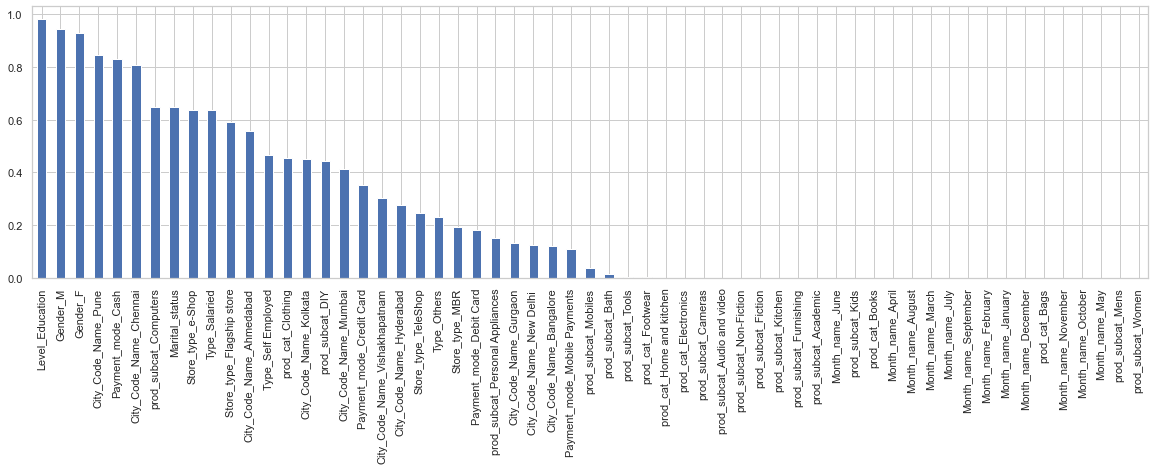

In [88]:
plt.figure(figsize=(20,5))
p_values.plot.bar()

In [89]:
# Now dropping the variables which have p-value i.e p-value > 0.05
X.drop(['Level_Education', 'Gender_M', 'Gender_F', 'City_Code_Name_Pune', 'Payment_mode_Cash', 'City_Code_Name_Chennai', 'prod_subcat_Computers',
       'Marital_status','Store_type_e-Shop','Type_Salaried','Store_type_Flagship store','City_Code_Name_Ahmedabad','Type_Self Employed',
       'prod_cat_Clothing','City_Code_Name_Kolkata','prod_subcat_DIY','City_Code_Name_Mumbai','Payment_mode_Credit Card', 'City_Code_Name_Vishakhapatnam',
       'City_Code_Name_Hyderabad','Store_type_TeleShop','Type_Others','Store_type_MBR','Payment_mode_Debit Card','prod_subcat_Personal Appliances',
'City_Code_Name_Gurgaon','City_Code_Name_Bangalore','City_Code_Name_New Delhi ','Payment_mode_Mobile Payments','prod_subcat_Mobiles','prod_subcat_Bath'],axis=1,inplace=True)

### Model Building

In [90]:
# Splitting the dataset into the Training set and Test set

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [92]:
X_train.shape

(13652, 34)

In [93]:
X_test.shape

(5852, 34)

### Standarisation of data

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 

In [96]:
X_test_scaled = scaler.transform(X_test)

### Synthetic Minority Oversampling Technique (SMOTE) to solve the problem of Imbalanced Data

In [97]:
from imblearn.over_sampling import SMOTE

In [98]:
os = SMOTE(random_state=0)
columns = X_train.columns

In [99]:
#On Train Data
X_train_SMOTE,y_train_SMOTE = os.fit_resample(X_train_scaled, y_train)
X_train_SMOTE = pd.DataFrame(data = X_train_SMOTE,columns=columns )
y_train_SMOTE = pd.DataFrame(data = y_train_SMOTE,columns=['Return'])

In [100]:
#On Test Data
X_test_SMOTE,y_test_SMOTE = os.fit_resample(X_test_scaled, y_test)
X_test_SMOTE = pd.DataFrame(data = X_test_SMOTE,columns=columns )
y_test_SMOTE = pd.DataFrame(data = y_test_SMOTE,columns=['Return'])

### Logistic Regression Model

In [101]:
# Fitting Multiple Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_SMOTE, y_train_SMOTE)

C:\Users\Ali\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Prediction of the Model

In [102]:
# Predicting the Test (Test_Scaled) set results 
y_pred = classifier.predict(X_test_scaled)

C:\Users\Ali\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [103]:
y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

In [105]:
confusion_matrix

array([[4693,  543],
       [  72,  544]], dtype=int64)

#### Confusion matrix

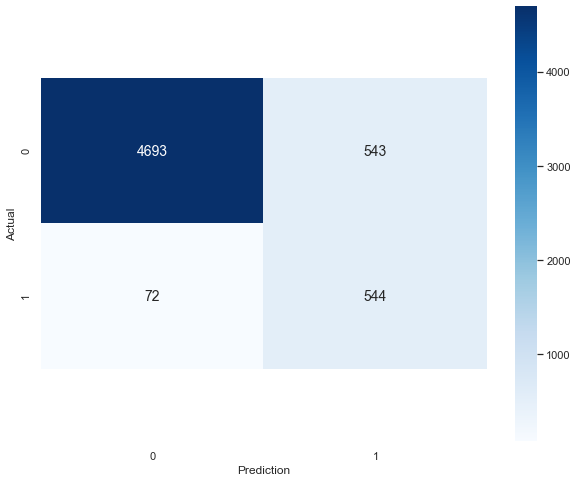

In [106]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [107]:
#### CLASSIFICATION REPORT ####
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_scaled, y_test)))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      5236
           1       0.50      0.88      0.64       616

    accuracy                           0.89      5852
   macro avg       0.74      0.89      0.79      5852
weighted avg       0.93      0.89      0.91      5852

Accuracy of logistic regression classifier on test set: 0.89


C:\Users\Ali\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### ROC AUC CURVE
ROC curve plots the true positive rate against false positive rate

In [108]:
from sklearn.metrics import roc_curve, roc_auc_score

C:\Users\Ali\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


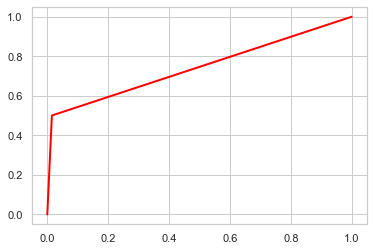

In [109]:
##Computing false and true positive rates
fpr, tpr,_= roc_curve(classifier.predict(X_test_scaled),y_test,drop_intermediate=False)

#plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')

In [109]:
roc_auc_score(classifier.predict(X_test_scaled),y_test)

C:\Users\Ali\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7426749016083428

### Random Forest Model

In [110]:
# building random forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_SMOTE, y_train_SMOTE)

<ipython-input-110-bcc538389b7e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train_SMOTE, y_train_SMOTE)


RandomForestClassifier()

In [111]:
# predicting the test results
rfc_pred = rfc.predict(X_test_scaled)
rfc_pred

C:\Users\Ali\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rfc_pred)

In [113]:
cm

array([[5067,  169],
       [ 144,  472]], dtype=int64)

#### Confusion Matrix

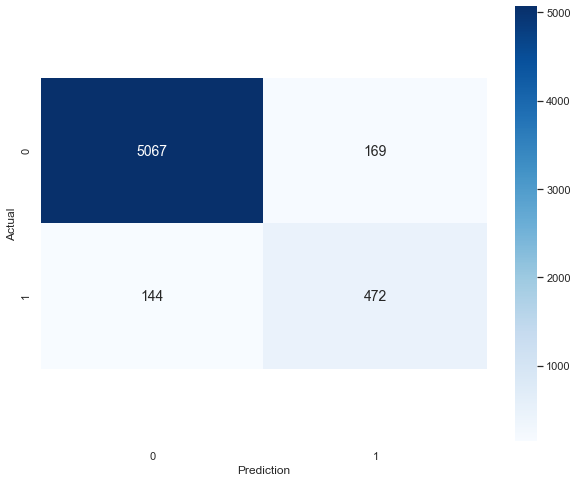

In [114]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [115]:
#### CLASSIFICATION REPORT ####
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rfc.score(X_test_scaled, y_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5236
           1       0.74      0.77      0.75       616

    accuracy                           0.95      5852
   macro avg       0.85      0.87      0.86      5852
weighted avg       0.95      0.95      0.95      5852

Accuracy of logistic regression classifier on test set: 0.95


C:\Users\Ali\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


C:\Users\Ali\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


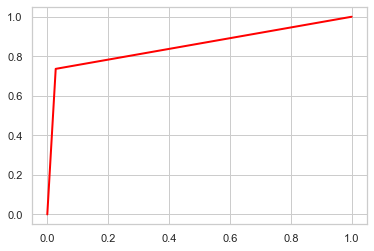

In [116]:
##Computing false and true positive rates
fpr, tpr,_= roc_curve(rfc.predict(X_test_scaled),y_test,drop_intermediate=False)

#plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')

In [117]:
roc_auc_score(rfc.predict(X_test_scaled),y_test)

C:\Users\Ali\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8543578012550556

### If we compare logistic regression model with random forest, the accurcay , f1-score and roc score is coming much better than logistic model. 
### We can say that Random forest model is better approach.

## Insights on Fresco Retailer Data
========================================================================================================

* The percentage of the products that have not returned are 89.5% and the returned is only 10.50%.


* The most of the transaction has been done by Mobile payments followed by debit and credit card.


* The most of the product was bought through E-shop which is the online mode.


* The maximum review for the product is 5.0 and the second highest review for product is 4.0.


* The Customer's education level is maximum for the miscellaneous.


* The maximum return for the product can be seen for the Self-Employed.


* We can see that the maximum customers are more interested in buying Footwear followed by Clothing.


* Most of the products that retuned were in months of January, May, October and November.

=========================================================================================================